# **Breast Cancer Wisconsin (Diagnostic) Data Set**
Predict whether the cancer is benign or malignant

**Description-**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3)32 Total Columns

**Ten real-valued features are computed for each cell nucleus:**

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

**Class distribution:** 357 benign, 212 malignant

**Result-** Model Accuracy 98.83% (Greater than sklearn.linear_model.LogisticRegression (98.2%))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv("data.csv")
df=df.drop('id',axis=1)
df = df.drop('Unnamed: 32', axis=1)
df.info()

In [0]:
df['diagnosis'].replace(["M","B"], [1,0], inplace=True)
df.head

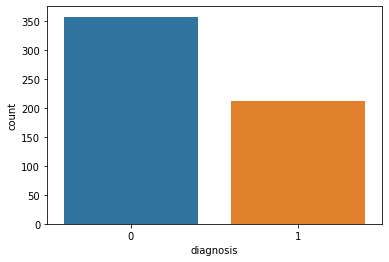

In [59]:
#fig=plt.figure(figsize=(8,4))
#Malignant is 1 and Benign is 0
sns.countplot(df['diagnosis'])

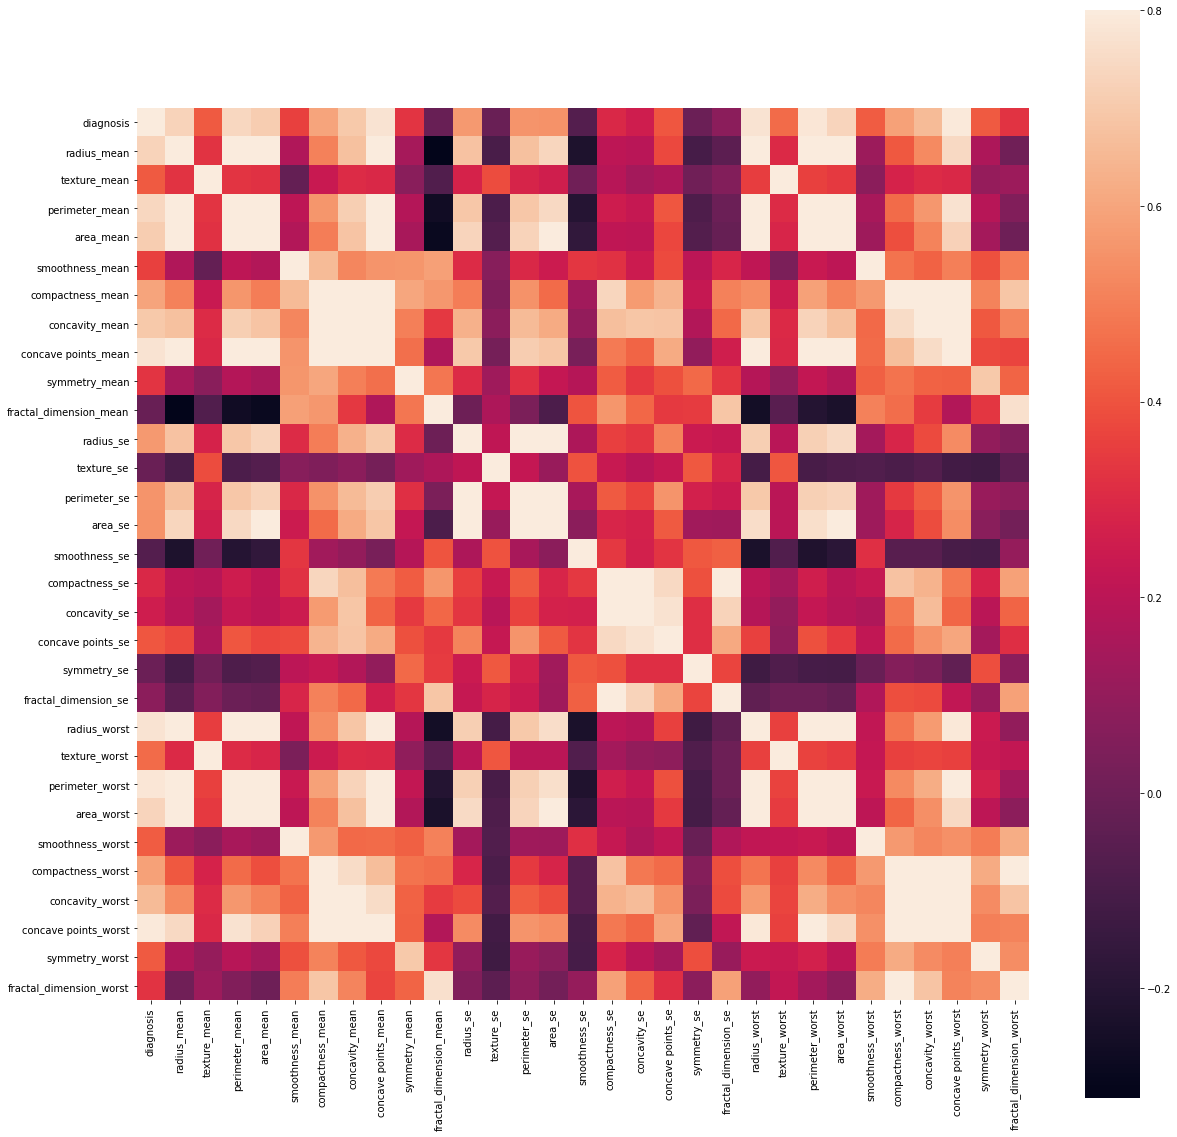

In [75]:
corrmat=df.corr()
fig = plt.figure(figsize = (20, 20))
# Mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,vmax=.8,square=True)
#plt.show()

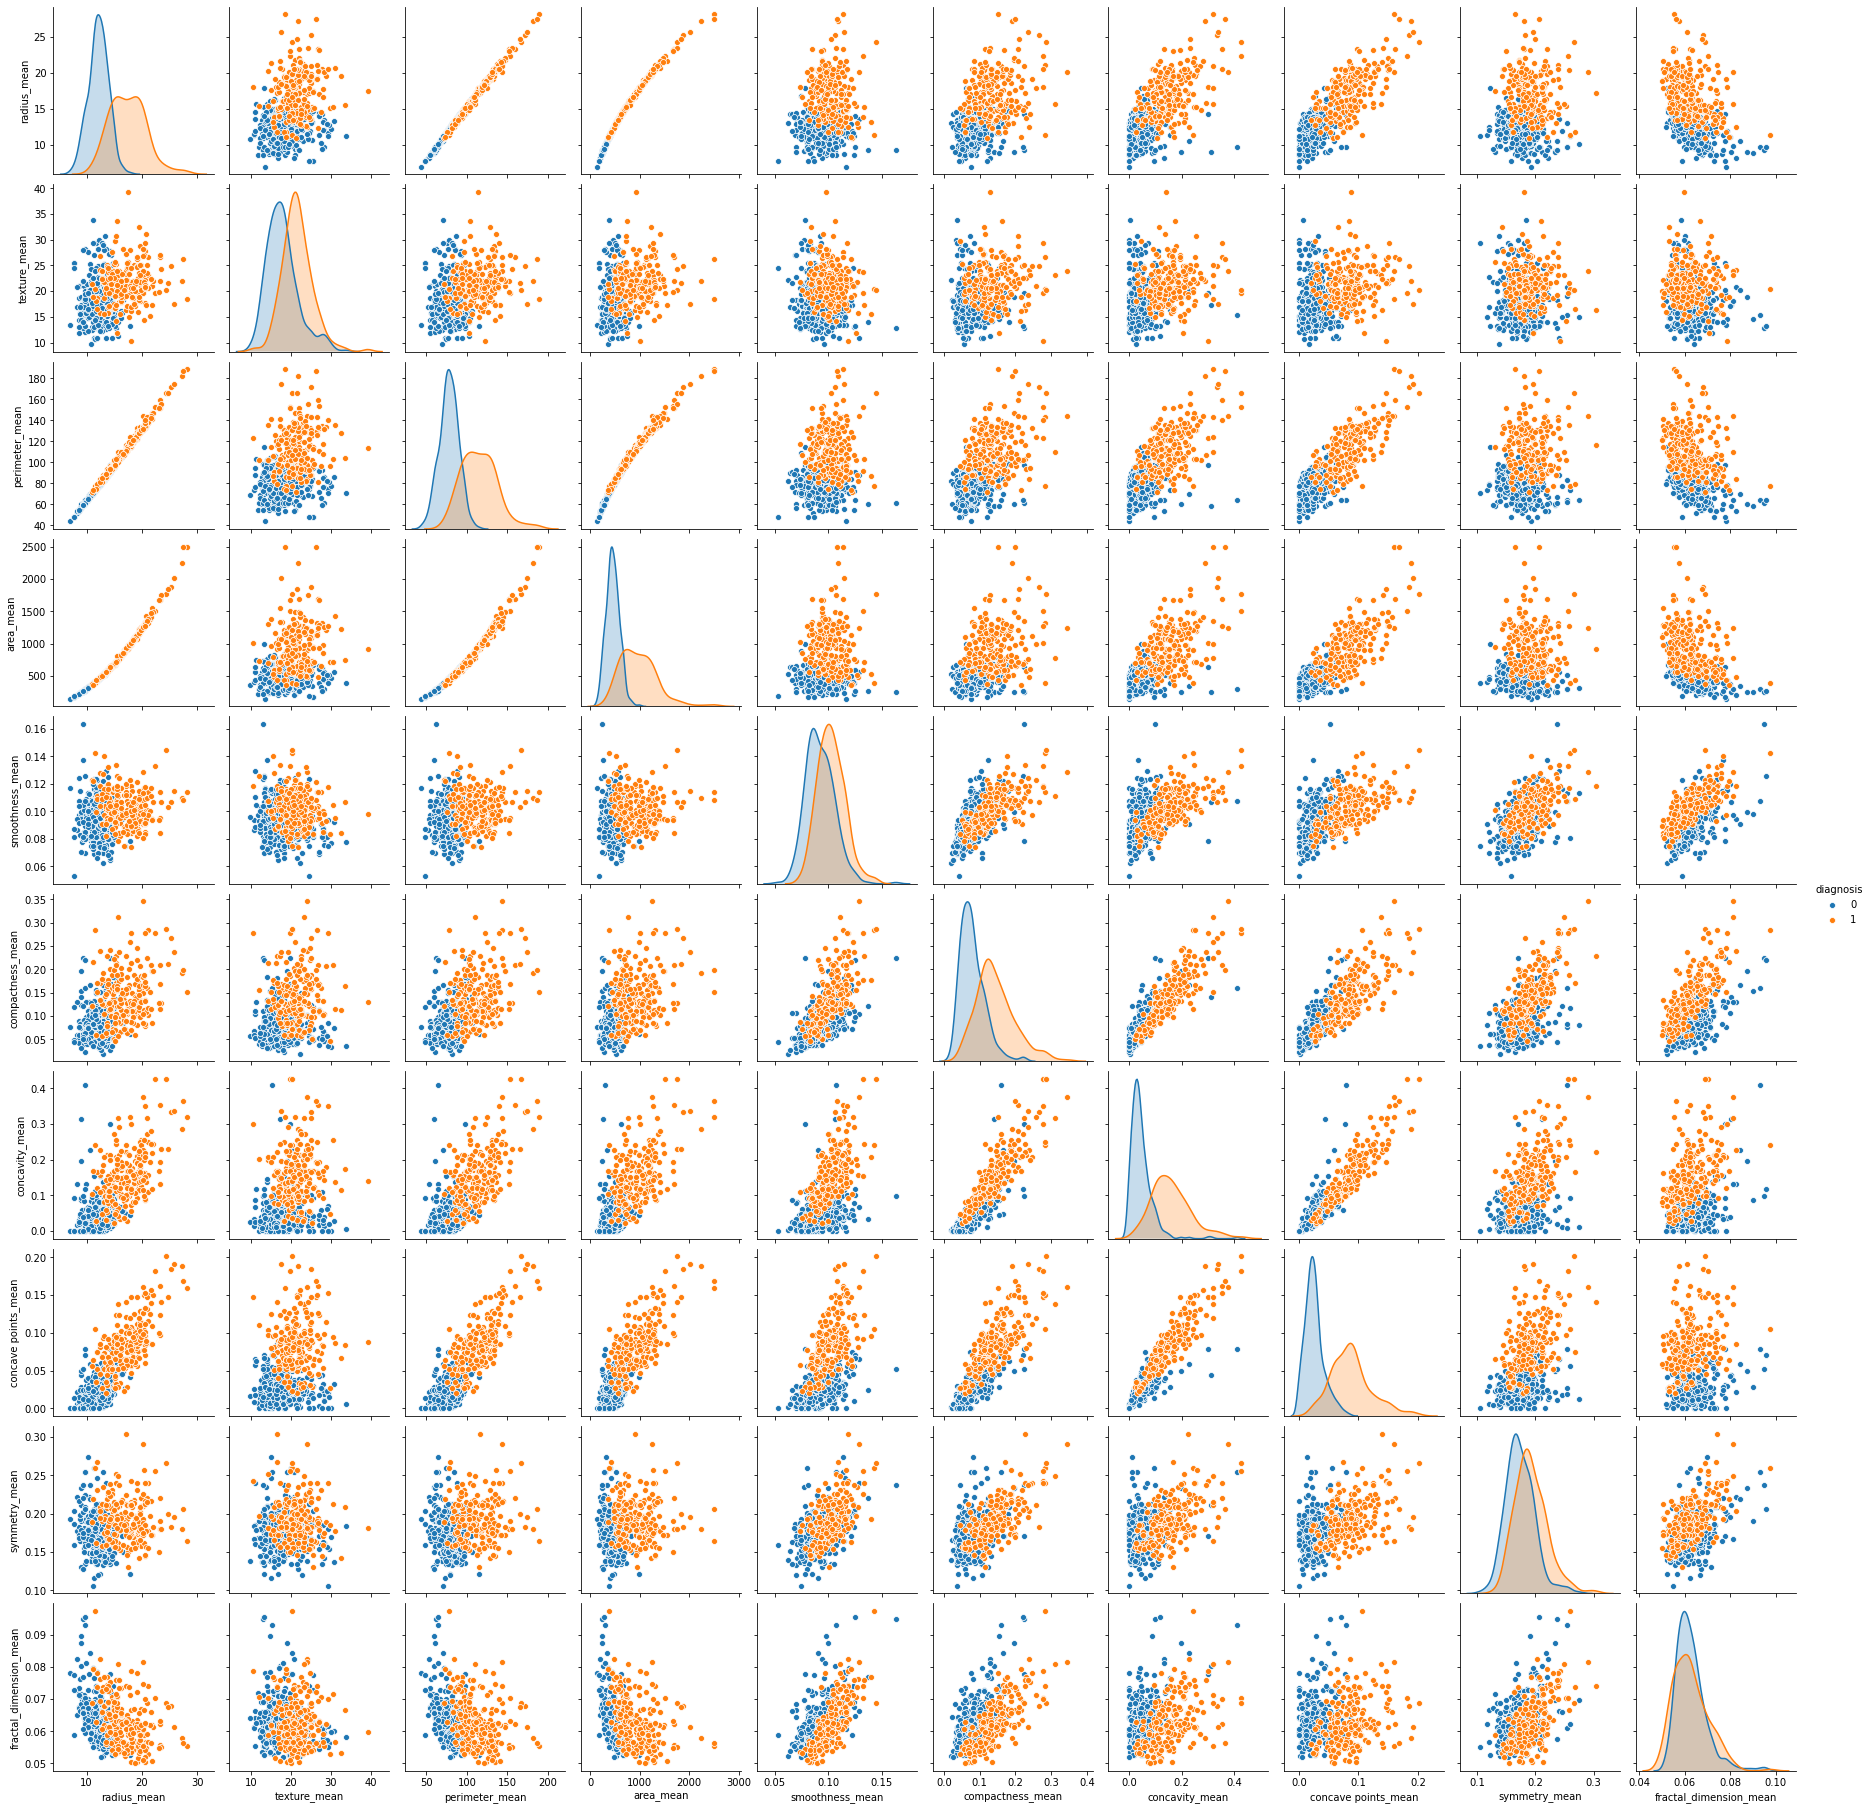

In [77]:
meanCols=['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
          'compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
sns.pairplot(data=df[meanCols],hue='diagnosis')

In [0]:
Y=df['diagnosis']
X=df.drop('diagnosis',axis=1)
#Normalization of data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [96]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 42)
yTrain=np.ravel(yTrain)
yTrain.shape=(398,1)
xTrain.shape

(398, 30)

# **Logistic Regression from Scratch**

In [0]:
def weightInit(X):
    w=np.zeros((1,X.shape[1]))
    b=0
    return w,b

def sigmoid(z):
    return 1/(1+np.exp(-z))

#Log Loss
def loss(h,y):
    cost = -y*np.log(h)-(1-y)*np.log(1-h)
    #l=-((y*np.log(h) + (1-y)*np.log(1-h)).mean)
    return cost.mean()
    
def model_fit(xTrain,yTrain,iterations,alpha=0.01):
    m=xTrain.shape[1]
    #w,b=weightInit(xTrain)
    #Weight Initialization
    w = np.zeros(shape=(1, m), dtype=np.float32)
    print(w.shape)
    loss1=[]
    for i in range(iterations):
        yPred=sigmoid(np.dot(w,xTrain.T))
        yPred=yPred.T
        l=loss(yPred,yTrain)
        if i%100==0:
            loss1.append(l)
        fr=yPred-yTrain        
        grad=(1/m)*(np.dot(xTrain.T,fr))        
        w=w-(alpha*grad.T)
        #b=b-(alpha*(fr))
    print(loss1)
    return w

def predict(xTest,w):
    yPred=sigmoid(np.dot(w,xTest.T))
    yPred=yPred.T
    for i in range(yPred.shape[0]):
        if yPred[i]>0.5:
            yPred[i]=1
        else:
            yPred[i]=0
    return yPred

w=model_fit(xTrain,yTrain,300)

In [112]:
yPred=predict(xTest,w)
yTest=np.ravel(yTest)
yTest.shape=(yTest.shape[0],1)
acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc*100)) 

The accuracy is 98.83040935672514


# **SkLearn Logistic Regression**

In [97]:
lr=LogisticRegression()
lr.fit(xTrain,yTrain)
yPred=lr.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc*100)) 

The accuracy is 98.24561403508771


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
